In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'boston.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Separate the features (X) and the target (y)
# Assuming 'MEDV' is the column with the house prices (target variable)
X = data.drop('medv', axis=1)
y = data['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
"""model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Optional: Compare actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head()) """


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


'model = LinearRegression()\n\n# Train the model\nmodel.fit(X_train, y_train)\n\n# Make predictions on the testing set\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nr2 = r2_score(y_test, y_pred)\n\nprint(f"Mean Squared Error: {mse}")\nprint(f"R^2 Score: {r2}")\n\n# Optional: Compare actual vs predicted values\ncomparison = pd.DataFrame({\'Actual\': y_test, \'Predicted\': y_pred})\nprint(comparison.head()) '

In [46]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
%pip install pandas scikit-learn


In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [49]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [50]:
X_train



array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [51]:
from sklearn.linear_model import LinearRegression


In [52]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model
regression = LinearRegression()
regression.fit(X_train_imputed, y_train)

# Make predictions
y_pred = regression.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 24.382479969353675
R^2 Score: 0.667513676254115


In [53]:
y_pred

array([28.97985905, 36.01742566, 14.81536363, 25.0240004 , 18.76930884,
       23.24602388, 17.65466889, 14.32206364, 23.01692155, 20.61674106,
       24.91293168, 18.65297152, -6.07902707, 21.75197927, 19.23538399,
       26.18242345, 20.65245043,  5.80088617, 40.48647385, 17.61368999,
       27.23551886, 30.05470579, 11.32655631, 24.13454802, 17.86438562,
       15.84601555, 22.77782218, 14.57353343, 22.43333787, 19.18487948,
       22.42500438, 25.2048878 , 25.92149519, 17.72144341, 16.76841438,
       16.96993121, 31.21620631, 20.1227901 , 23.76050256, 24.6198264 ,
       13.93043966, 32.23338714, 42.65832574, 17.32654225, 27.25262975,
       16.99946074, 14.05650687, 25.88911195, 20.2962524 , 29.94425025,
       21.30348969, 34.33598167, 16.02710323, 26.19670124, 39.52340494,
       22.58379797, 18.84634825, 32.71494568, 25.04886971, 12.89664169,
       20.71002178, 30.4840625 , 31.50861221, 15.88898672, 20.23638195,
       16.71326566, 20.51814914, 25.95244502, 30.60806011, 11.60

In [54]:
## print the coefficients and the intercept
print(regression.coef_)

[-1.00201085  0.69987936  0.28719847  0.71991632 -2.01975503  3.14906925
 -0.17178628 -3.07095127  2.25725194 -1.7688877  -2.04405534  1.12870526
 -3.61770602]


In [55]:
print(regression.intercept_)

22.796534653465343


In [56]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

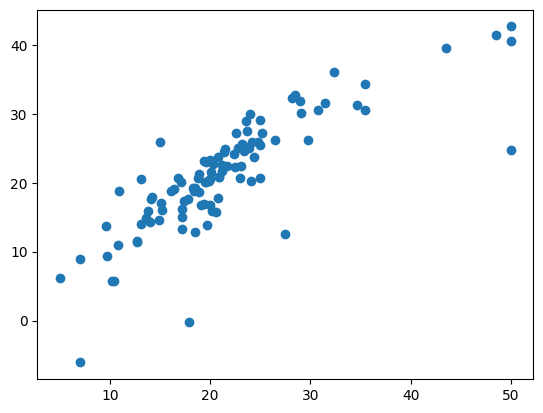

In [57]:
## plot a scatter plot for the prediction
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [58]:
residuals=y_test-y_pred


In [59]:
residuals

173    -5.379859
274    -3.617426
491    -1.215364
72     -2.224000
452    -2.669309
         ...    
412    18.056675
436    -4.083655
411     1.027825
86      0.241704
75     -3.070827
Name: medv, Length: 102, dtype: float64

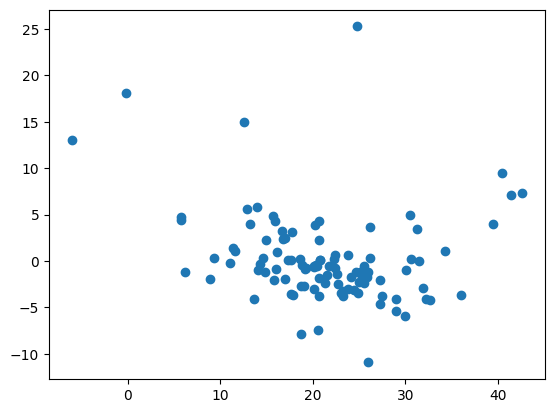

In [60]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred,residuals)

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

3.204209120227137
24.382479969353675
4.937861882369096


In [62]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.667513676254115


In [63]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6183963784280182

In [67]:
# Assuming 'data' is a Pandas DataFrame and 'X' contains the feature columns (used for training)
# Select the features from the first row
new_data = data.drop('medv', axis=1).iloc[0].values.reshape(1, -1)

# Transform the new data using the scaler
transformed_data = scaler.transform(new_data)

# Predict the value using the trained regression model
predicted_value = regression.predict(transformed_data)

# Output the predicted value
print(predicted_value)


[29.94425025]


C:\Users\91636\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [69]:
#import pickle
#pickle.dump(regression,open('regmodel.pkl','wb'))
#pickled_model=pickle.load(open('regmodel.pkl','rb'))
## Prediction
#pickled_model.predict(scaler.transform(data[0].reshape(1,-1)))

import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

# Save the trained regression model
pickle.dump(regression, open('regmodel.pkl', 'wb'))

# Load the saved model
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

# Select the first row of feature data (excluding the target column)
new_data = data.drop('medv', axis=1).iloc[0].values.reshape(1, -1)

# Transform the new data using the scaler
transformed_data = scaler.transform(new_data)

# Predict using the loaded model
predicted_value = pickled_model.predict(transformed_data)

# Output the predicted value
print(predicted_value)



[29.94425025]


C:\Users\91636\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
